In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    adjusted_mutual_info_score,
    homogeneity_completeness_v_measure
)

In [26]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [27]:
df = pd.read_csv("Adidas US Sales.csv", sep=";")

In [28]:
features = ['price_per_unit', 'units_sold', 'total_sales', 'operating_profit']
D1 = df[features].copy()

In [29]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(df['product'])

In [30]:
scaler = StandardScaler()
D1_scaled = scaler.fit_transform(D1)

In [31]:
pca = PCA(n_components=2)
D2 = pca.fit_transform(D1_scaled)

In [32]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
D3 = tsne.fit_transform(D1_scaled)

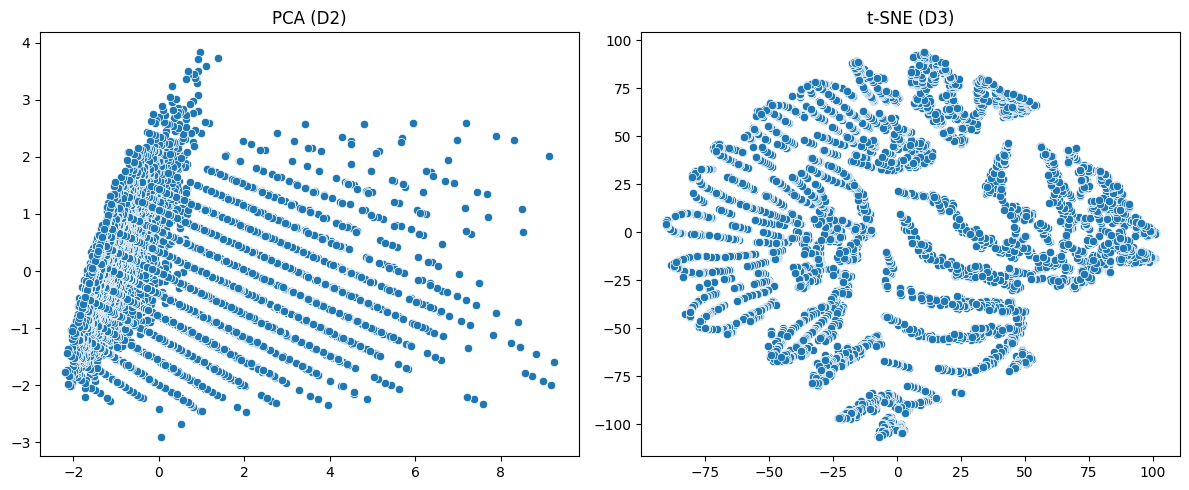

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=D2[:, 0], y=D2[:, 1])
plt.title("PCA (D2)")

plt.subplot(1, 2, 2)
sns.scatterplot(x=D3[:, 0], y=D3[:, 1])
plt.title("t-SNE (D3)")

plt.tight_layout()
plt.show()

In [34]:
def clustering_metrics(X, true_labels, method, n_clusters=3):
    if method == "kmeans":
        model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    elif method == "dbscan":
        model = DBSCAN(eps=1.5, min_samples=3)
    elif method == "agglomerative":
        model = AgglomerativeClustering(n_clusters=n_clusters)

    pred_labels = model.fit_predict(X)

    if len(set(pred_labels)) > 1:
        silhouette = silhouette_score(X, pred_labels)
        ari = adjusted_rand_score(true_labels, pred_labels)
        ami = adjusted_mutual_info_score(true_labels, pred_labels)
        h, c, v = homogeneity_completeness_v_measure(true_labels, pred_labels)
    else:
        silhouette, ari, ami, h, c, v = [-1] * 6

    return {
        'ARI': ari,
        'AMI': ami,
        'Homogeneity': h,
        'Completeness': c,
        'V-measure': v,
        'Silhouette': silhouette
    }

In [35]:
datasets = {'D1': D1_scaled, 'D2': D2, 'D3': D3}
methods = ['kmeans', 'dbscan', 'agglomerative']

In [36]:
print("\n🔍 Метрики качества кластеризации:")
for name, data in datasets.items():
    print(f"\n📦 Датасет: {name}")
    for method in methods:
        scores = clustering_metrics(data, true_labels, method)
        print(f"  🔹 {method:<14}: Silhouette={scores['Silhouette']:.3f}, ARI={scores['ARI']:.3f}, "
              f"AMI={scores['AMI']:.3f}, H={scores['Homogeneity']:.3f}, "
              f"C={scores['Completeness']:.3f}, V={scores['V-measure']:.3f}")


🔍 Метрики качества кластеризации:

📦 Датасет: D1
  🔹 kmeans        : Silhouette=0.364, ARI=0.022, AMI=0.027, H=0.021, C=0.037, V=0.027
  🔹 dbscan        : Silhouette=-1.000, ARI=-1.000, AMI=-1.000, H=-1.000, C=-1.000, V=-1.000
  🔹 agglomerative : Silhouette=0.461, ARI=0.004, AMI=0.010, H=0.008, C=0.019, V=0.011

📦 Датасет: D2
  🔹 kmeans        : Silhouette=0.384, ARI=0.022, AMI=0.027, H=0.021, C=0.037, V=0.027
  🔹 dbscan        : Silhouette=-1.000, ARI=-1.000, AMI=-1.000, H=-1.000, C=-1.000, V=-1.000
  🔹 agglomerative : Silhouette=0.479, ARI=0.005, AMI=0.012, H=0.009, C=0.021, V=0.012

📦 Датасет: D3
  🔹 kmeans        : Silhouette=0.409, ARI=0.017, AMI=0.020, H=0.016, C=0.026, V=0.020
  🔹 dbscan        : Silhouette=0.348, ARI=0.005, AMI=0.068, H=0.212, C=0.067, V=0.102
  🔹 agglomerative : Silhouette=0.337, ARI=0.019, AMI=0.023, H=0.019, C=0.030, V=0.023


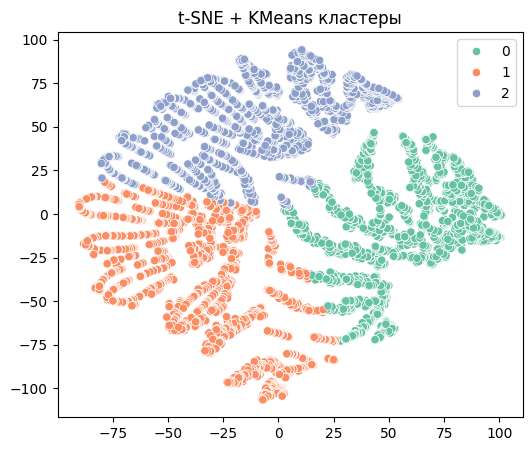

In [37]:
best_labels = KMeans(n_clusters=3, random_state=42, n_init=10).fit_predict(D3)
plt.figure(figsize=(6, 5))
sns.scatterplot(x=D3[:, 0], y=D3[:, 1], hue=best_labels, palette="Set2")
plt.title("t-SNE + KMeans кластеры")
plt.show()